# Module and Data imports

In [ ]:
from statsmodels.miscmodels.ordinal_model import OrderedModel
from pandas.api.types import CategoricalDtype
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, confusion_matrix, make_scorer, ConfusionMatrixDisplay, precision_score, recall_score, accuracy_score

# Import the dataset and store in a variable df
df = pd.read_excel('ObesityDataSet.xlsx',sheet_name='ObesityDataSet')
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


# Data Cleaning and Transformation

## Column name mapping

In [ ]:
print("Old Column Names: ",df.columns)
# Rename columns
column_rename_dict = {
    'NObeyesdad': 'obesity',
    'MTRANS': 'transportation_mode',
    'FAVC': 'frequency_consumption_of_high_calorie_food',
    'FCVC': 'frequency_consumption_of_vegetables',
    'NCP': 'number_of_main_meals',
    'CAEC': 'consumption_of_food_between_meals',
    'SMOKE': 'smoker',
    'CH2O': 'consumption_of_water_daily',
    'SCC': 'calorie_consumption_monitoring',
    'FAF': 'physical_activity_frequency',
    'TUE': 'time_using_technology_devices',
    'CALC': 'consumption_of_alcohol'

}
df.rename(columns=column_rename_dict, inplace=True)
# Convert column names to lowercase
df.rename(columns=lambda x: x.lower(), inplace=True)
print("New Column Names: ",df.columns)

Old Column Names:  Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')
New Column Names:  Index(['gender', 'age', 'height', 'weight', 'family_history_with_overweight',
       'frequency_consumption_of_high_calorie_food',
       'frequency_consumption_of_vegetables', 'number_of_main_meals',
       'consumption_of_food_between_meals', 'smoker',
       'consumption_of_water_daily', 'calorie_consumption_monitoring',
       'physical_activity_frequency', 'time_using_technology_devices',
       'consumption_of_alcohol', 'transportation_mode', 'obesity'],
      dtype='object')


## Transformation of Binary Variables

In [ ]:
# Convert to 1 and 0
binary_map = {'yes':1, 'no':0}

# Binary Variables

# FAVC
df['frequency_consumption_of_high_calorie_food'] = df['frequency_consumption_of_high_calorie_food'].map(binary_map)

# Gender
df['gender'] = df['gender'].map({'Male':1, 'Female':0})

# SCC
df['calorie_consumption_monitoring'] = df['calorie_consumption_monitoring'].map(binary_map)

# Smoke
df['smoker'] = df['smoker'].map(binary_map)

# Family_history_with_overweight
df['family_history_with_overweight'] = df['family_history_with_overweight'].map(binary_map)

#print df after binary data transformation
print(df.head())

   gender   age  height  weight  family_history_with_overweight  \
0       0  21.0    1.62    64.0                               1   
1       0  21.0    1.52    56.0                               1   
2       1  23.0    1.80    77.0                               1   
3       1  27.0    1.80    87.0                               0   
4       1  22.0    1.78    89.8                               0   

   frequency_consumption_of_high_calorie_food  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   frequency_consumption_of_vegetables  number_of_main_meals  \
0                                  2.0                   3.0   
1                                  3.0                   3.0   
2                                  2.0                   3.0   
3                                  3.0        

## Transformation of Ordinal Variables

In [ ]:
# Ordinal Variables
ordinal_map={'no':0, 'Sometimes':1, 'Frequently':2, 'Always':3}

#CAEC
df['consumption_of_food_between_meals'] = df['consumption_of_food_between_meals'].map(ordinal_map)
#CALC
df['consumption_of_alcohol'] = df['consumption_of_alcohol'].map(ordinal_map)

#print df after ordinal data transformation
print(df.head())


   gender   age  height  weight  family_history_with_overweight  \
0       0  21.0    1.62    64.0                               1   
1       0  21.0    1.52    56.0                               1   
2       1  23.0    1.80    77.0                               1   
3       1  27.0    1.80    87.0                               0   
4       1  22.0    1.78    89.8                               0   

   frequency_consumption_of_high_calorie_food  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   frequency_consumption_of_vegetables  number_of_main_meals  \
0                                  2.0                   3.0   
1                                  3.0                   3.0   
2                                  2.0                   3.0   
3                                  3.0        

## Transform Transportation column into Dummy variables

In [ ]:
print("Value Counts before transformation: ",df['transportation_mode'].value_counts())
# Converge the Motorbike and Automobile columns
df['transportation_mode'] = df['transportation_mode'].replace({'Automobile':'transport_automatic'})
df['transportation_mode'] = df['transportation_mode'].replace({'Motorbike':'transport_automatic'})
df['transportation_mode'] = df['transportation_mode'].replace({'Public_Transportation':'transport_automatic'})
df['transportation_mode'] = df['transportation_mode'].replace({'Walking':'transport_physical'})
df['transportation_mode'] = df['transportation_mode'].replace({'Bike':'transport_physical'})
print("Value Counts after transformation: ",df['transportation_mode'].value_counts())

transportation_map= {"transport_physical":0,"transport_automatic":1}
# Apply Binary transformation to transportation variable
df['transportation_mode'] = df['transportation_mode'].map(transportation_map)

# print df after transformation
print(df.head())

Value Counts before transformation:  Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: transportation_mode, dtype: int64
Value Counts after transformation:  transport_automatic    2048
transport_physical       63
Name: transportation_mode, dtype: int64
   gender   age  height  weight  family_history_with_overweight  \
0       0  21.0    1.62    64.0                               1   
1       0  21.0    1.52    56.0                               1   
2       1  23.0    1.80    77.0                               1   
3       1  27.0    1.80    87.0                               0   
4       1  22.0    1.78    89.8                               0   

   frequency_consumption_of_high_calorie_food  \
0                                           0   
1                                           0   
2                                           0   
3                                         

## Transformation of target variable

In [ ]:
print("Obesity types and values before transformation: \n",df["obesity"].value_counts())

# Map the values of the obesity and overweight columns to handle class imbalance
df["obesity"] = df["obesity"].replace('Overweight_Level_II', 'Overweight_Level_I_and_II')
df["obesity"] = df["obesity"].replace('Overweight_Level_I', 'Overweight_Level_I_and_II')
df["obesity"] = df["obesity"].replace('Obesity_Type_II', 'Obesity_Type_II_and_III')
df["obesity"] = df["obesity"].replace('Obesity_Type_III', 'Obesity_Type_II_and_III')

print("Obesity types and values after transformation: \n",df["obesity"].value_counts())


#Convert obesity to ordinal variable for better prediction capability
cat_type = CategoricalDtype(categories=['Insufficient_Weight', 'Normal_Weight',
                                        'Overweight_Level_I_and_II',
                                        'Obesity_Type_I', 'Obesity_Type_II_and_III'], ordered=True)
df["obesity"] = df["obesity"].astype(cat_type)

df.head()

Obesity types and values before transformation: 
 Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: obesity, dtype: int64
Obesity types and values after transformation: 
 Obesity_Type_II_and_III      621
Overweight_Level_I_and_II    580
Obesity_Type_I               351
Normal_Weight                287
Insufficient_Weight          272
Name: obesity, dtype: int64


,gender,age,height,weight,family_history_with_overweight,frequency_consumption_of_high_calorie_food,frequency_consumption_of_vegetables,number_of_main_meals,consumption_of_food_between_meals,smoker,consumption_of_water_daily,calorie_consumption_monitoring,physical_activity_frequency,time_using_technology_devices,consumption_of_alcohol,transportation_mode,obesity
0,0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,1,Normal_Weight
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,1,Normal_Weight
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,1,Normal_Weight
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,Overweight_Level_I_and_II
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,1,Overweight_Level_I_and_II


In [ ]:
# Check the data types to make sure all are as per the requirement of the model
df.dtypes

gender                                           int64
age                                            float64
height                                         float64
weight                                         float64
family_history_with_overweight                   int64
frequency_consumption_of_high_calorie_food       int64
frequency_consumption_of_vegetables            float64
number_of_main_meals                           float64
consumption_of_food_between_meals                int64
smoker                                           int64
consumption_of_water_daily                     float64
calorie_consumption_monitoring                   int64
physical_activity_frequency                    float64
time_using_technology_devices                  float64
consumption_of_alcohol                           int64
transportation_mode                              int64
obesity                                       category
dtype: object

# Linear Regression to Predict BMI

##  Create the BMI variable to predict and round it to 2 decimals

In [ ]:
df_linear = df.copy()

# Calculate BMI
df_linear['bmi'] = df_linear['weight'] / (df_linear['height'] * df_linear['height'])
df_linear['bmi'] = round(df_linear['bmi'], 2)
print(df_linear.head())

   gender   age  height  weight  family_history_with_overweight  \
0       0  21.0    1.62    64.0                               1   
1       0  21.0    1.52    56.0                               1   
2       1  23.0    1.80    77.0                               1   
3       1  27.0    1.80    87.0                               0   
4       1  22.0    1.78    89.8                               0   

   frequency_consumption_of_high_calorie_food  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   frequency_consumption_of_vegetables  number_of_main_meals  \
0                                  2.0                   3.0   
1                                  3.0                   3.0   
2                                  2.0                   3.0   
3                                  3.0        

## Train Test Split and build the Linear Model

In [ ]:
# Split the data into features (X) and target (y)
X = df_linear.drop(['obesity', 'bmi','weight','transportation_mode'], axis=1)
y = df_linear['bmi']
print(X.columns)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)

# Initialize the Linear Regression model
linear_regressor = LinearRegression()

# Train the model on the training data
linear_regressor.fit(X_train, y_train)

Index(['gender', 'age', 'height', 'family_history_with_overweight',
       'frequency_consumption_of_high_calorie_food',
       'frequency_consumption_of_vegetables', 'number_of_main_meals',
       'consumption_of_food_between_meals', 'smoker',
       'consumption_of_water_daily', 'calorie_consumption_monitoring',
       'physical_activity_frequency', 'time_using_technology_devices',
       'consumption_of_alcohol'],
      dtype='object')


LinearRegression()

## Evaluate the Linear Model

### Function to map predicted BMI values to Obesity level

In [ ]:
# map the bmi values to the obesity level
def bmi_to_obesity(bmi):
    """
    This function takes BMI as input and returns the corresponding obesity category.

    Parameters:
        bmi (float): Body Mass Index (BMI) value

    Returns:
        str: Obesity category
    """
    if bmi < 18.5:
        return 'Insufficient_Weight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal_Weight'
    elif 24.9 <= bmi < 29.9:
        return 'Overweight_Level_I_and_II'
    elif 29.9 <= bmi < 34.9:
        return 'Obesity_Type_I'
    else:
        return 'Obesity_Type_II_and_III'

### Predict the BMI values using the Linear Model and store the values in a df for comparison

In [ ]:
# Make predictions on the testing data
y_pred = linear_regressor.predict(X_test)

# Retrieve the coefficients and corresponding feature names
coefficients = linear_regressor.coef_
feature_names = X.columns

# Create a DataFrame to display coefficients in a tabular format
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by the absolute values of the coefficients in descending order
coefficients_df = coefficients_df.reindex(coefficients_df['Coefficient'].sort_values(ascending=False).index)

# Print the DataFrame
print(coefficients_df)


# Save predictions to a CSV file
df_comparison = pd.DataFrame({'BMI_Actual': y_test, 'BMI_Predicted': y_pred})
df_comparison["Obesity_Level_Actual"]=df_comparison['BMI_Actual'].apply(bmi_to_obesity)
df_comparison["Obesity_Level_Predicted"]=df_comparison['BMI_Predicted'].apply(bmi_to_obesity)
df_comparison.to_csv('Linear_Model_Output.csv')

                                       Feature  Coefficient
2                                       height     8.544006
3               family_history_with_overweight     7.390981
5          frequency_consumption_of_vegetables     3.523110
13                      consumption_of_alcohol     1.918285
4   frequency_consumption_of_high_calorie_food     1.883182
9                   consumption_of_water_daily     0.529462
6                         number_of_main_meals     0.171334
1                                          age     0.132913
12               time_using_technology_devices    -0.383855
8                                       smoker    -0.676684
11                 physical_activity_frequency    -1.275340
0                                       gender    -1.635551
10              calorie_consumption_monitoring    -2.463016
7            consumption_of_food_between_meals    -3.832921


### Evaluate the linear model

Accuracy: 0.37115839243498816
Classification Report:
                           precision    recall  f1-score   support

      Insufficient_Weight       0.27      0.06      0.09        54
            Normal_Weight       0.33      0.34      0.34        67
           Obesity_Type_I       0.27      0.51      0.35        83
  Obesity_Type_II_and_III       0.82      0.47      0.59       118
Overweight_Level_I_and_II       0.29      0.34      0.31       101

                 accuracy                           0.37       423
                macro avg       0.40      0.34      0.34       423
             weighted avg       0.44      0.37      0.37       423



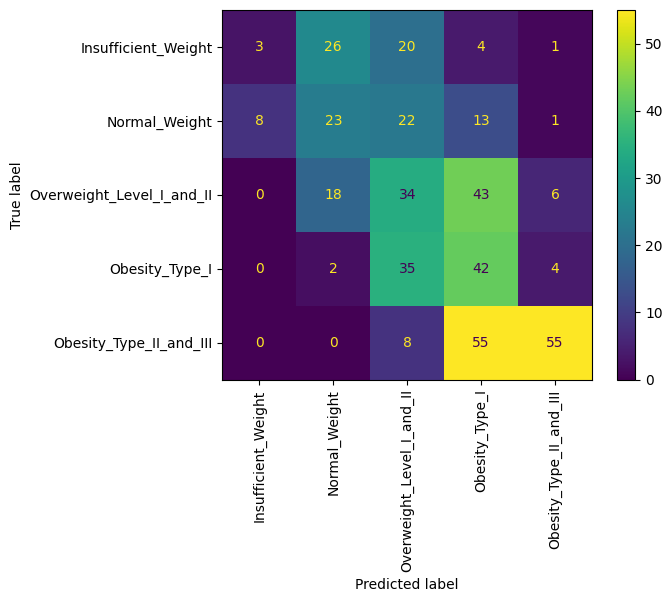

Weighted Precision: 0.4373220856160542
Weighted Recall: 0.37115839243498816
                           precision    recall  f1-score   support

      Insufficient_Weight       0.27      0.06      0.09        54
            Normal_Weight       0.33      0.34      0.34        67
           Obesity_Type_I       0.27      0.51      0.35        83
  Obesity_Type_II_and_III       0.82      0.47      0.59       118
Overweight_Level_I_and_II       0.29      0.34      0.31       101

                 accuracy                           0.37       423
                macro avg       0.40      0.34      0.34       423
             weighted avg       0.44      0.37      0.37       423



In [ ]:
# Evaluate the model
accuracy = accuracy_score(df_comparison["Obesity_Level_Actual"], df_comparison["Obesity_Level_Predicted"])
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(df_comparison["Obesity_Level_Actual"], df_comparison["Obesity_Level_Predicted"]))
obesity_levels =['Insufficient_Weight', 'Normal_Weight','Overweight_Level_I_and_II','Obesity_Type_I', 'Obesity_Type_II_and_III']
# Create and plot the confusion matrix
cm = confusion_matrix(df_comparison["Obesity_Level_Actual"], df_comparison["Obesity_Level_Predicted"], labels=obesity_levels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=obesity_levels)
disp.plot()
plt.xticks(rotation=90)
plt.show()


# Calculate weighted precision
weighted_precision = precision_score(df_comparison["Obesity_Level_Actual"], df_comparison["Obesity_Level_Predicted"], average='weighted')

# Calculate weighted recall
weighted_recall = recall_score(df_comparison["Obesity_Level_Actual"], df_comparison["Obesity_Level_Predicted"], average='weighted')

# Print the weighted precision and recall
print("Weighted Precision:", weighted_precision)
print("Weighted Recall:", weighted_recall)

# Let's look at the model metrics
print(classification_report(df_comparison["Obesity_Level_Actual"], df_comparison["Obesity_Level_Predicted"]))

# Ordinal Logistic Regression

## Train Test Split and Ordinal Logit Model

In [ ]:
# Train-Test split on df
X = df.drop(['obesity', 'weight','transportation_mode'], axis=1)
y = df['obesity']

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size = 0.20, stratify=y, random_state = 42)


# Feature scaling for numerical features
num_cols = ['age', 'height', 'frequency_consumption_of_vegetables', 'number_of_main_meals', 'consumption_of_water_daily', 'physical_activity_frequency', 'time_using_technology_devices']  # Replace with actual numerical columns
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

print("X train shape: ",X_train.shape)
print("X test shape: ",X_test.shape)
print("Y train shape: ",y_train.shape)
print("Y test shape: ",y_test.shape)

#Running the Ordinal Logit Model
mod_log = OrderedModel(y_train,X_train,distr='logit')

res_log = mod_log.fit(method='bfgs', disp=False)

#print the model Summary
print(res_log.summary())

X train shape:  (1688, 14)
X test shape:  (423, 14)
Y train shape:  (1688,)
Y test shape:  (423,)
                             OrderedModel Results                             
Dep. Variable:                obesity   Log-Likelihood:                -2147.8
Model:                   OrderedModel   AIC:                             4332.
Method:            Maximum Likelihood   BIC:                             4429.
Date:                Tue, 12 Mar 2024                                         
Time:                        03:47:47                                         
No. Observations:                1688                                         
Df Residuals:                    1670                                         
Df Model:                          14                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------

In [ ]:
# Extract the coefficients and their standard errors from the model results
coef = res_log.params
stderr = res_log.bse

# Create a DataFrame to store coefficients and standard errors
coef_df = pd.DataFrame({'Coefficient': coef, 'Standard Error': stderr})

# Exclude coefficients for specific variables
excluded_variables = ['Insufficient_Weight/Normal_Weight', 'Normal_Weight/Overweight_Level_I_and_II', 'Overweight_Level_I_and_II/Obesity_Type_I', 'Obesity_Type_I/Obesity_Type_II_and_III']
coef_df = coef_df[~coef_df.index.isin(excluded_variables)]

# Sort the coefficients by value in descending order
sorted_coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Print the sorted coefficients
print(sorted_coef_df)


## Ordinal Logit Model Evalutaion

Accuracy: 0.4728132387706856
Classification Report:
                           precision    recall  f1-score   support

      Insufficient_Weight       0.42      0.45      0.44        55
            Normal_Weight       0.44      0.07      0.12        58
           Obesity_Type_I       0.00      0.00      0.00        70
  Obesity_Type_II_and_III       0.55      0.93      0.69       124
Overweight_Level_I_and_II       0.39      0.48      0.43       116

                 accuracy                           0.47       423
                macro avg       0.36      0.39      0.34       423
             weighted avg       0.38      0.47      0.39       423



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


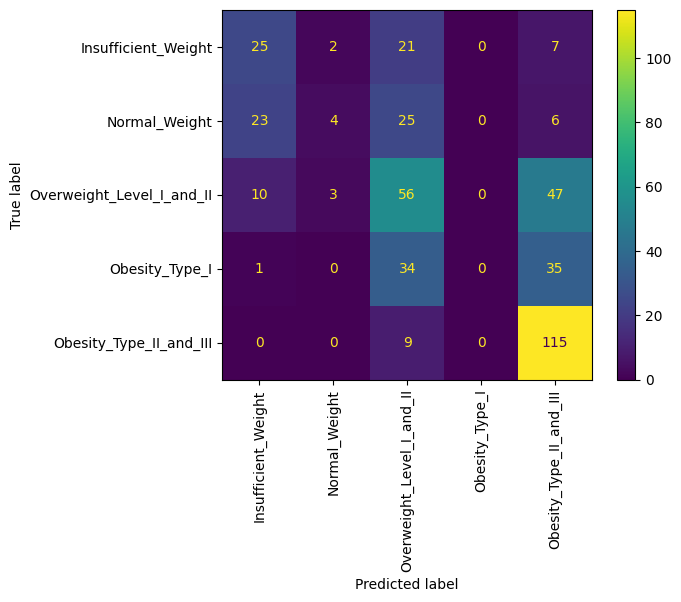

Weighted Precision: 0.3824766534948047
Weighted Recall: 0.4728132387706856


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Check the output of the prediction
y_pred = res_log.predict(X_test)

y_pred_labels = y_pred.idxmax(axis=1)
y_pred_labels = y_pred_labels.replace({0:'Insufficient_Weight', 1:'Normal_Weight', 2:'Overweight_Level_I_and_II',
                                       3:'Obesity_Type_I', 4:'Obesity_Type_II_and_III'})
# y_test['Predicted']=y_pred_labels
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_labels)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_labels))

df_ord_logit = pd.DataFrame({"Actual Values":y_test,"Predicted Values": y_pred_labels})
df_ord_logit.to_csv("Ordered_Logit_Output.csv")

# Create and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_labels, labels=obesity_levels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=obesity_levels)
disp.plot()
plt.xticks(rotation=90)
plt.show()

# Calculate weighted precision
weighted_precision = precision_score(y_test, y_pred_labels, average='weighted')

# Calculate weighted recall
weighted_recall = recall_score(y_test, y_pred_labels, average='weighted')

# Print the weighted precision and recall
print("Weighted Precision:", weighted_precision)
print("Weighted Recall:", weighted_recall)


# CART Classification

## Cart Model by Using Grid Search

In [ ]:
# Split the data into features (X) and target (y)
X = df.drop(['obesity','weight','transportation_mode'], axis=1)
y = df['obesity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling for numerical features
num_cols = ['age', 'height', 'frequency_consumption_of_vegetables', 'number_of_main_meals', 'consumption_of_water_daily', 'physical_activity_frequency', 'time_using_technology_devices']  # Replace with actual numerical columns
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

parameters = {
    'max_depth': [5, 10, 12, 15],  # find depth
    'min_samples_split': [2, 5, 10],  # find minimum size in each sample
    'min_samples_leaf': [1, 2, 4]  # find minimum samples leaf
}

# create a tree
decision_tree = DecisionTreeClassifier(random_state = 42)

# Built GridSearchCV
gs = GridSearchCV(estimator=decision_tree, param_grid=parameters, cv=5)

# train and fit model
gs.fit(X_train, y_train)

# see result
print(gs.best_params_)

# Here is the best model
best_decision_tree = gs.best_estimator_

# get prediction
y_pred = best_decision_tree.predict(X_test)

{'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}


Best CART Tree


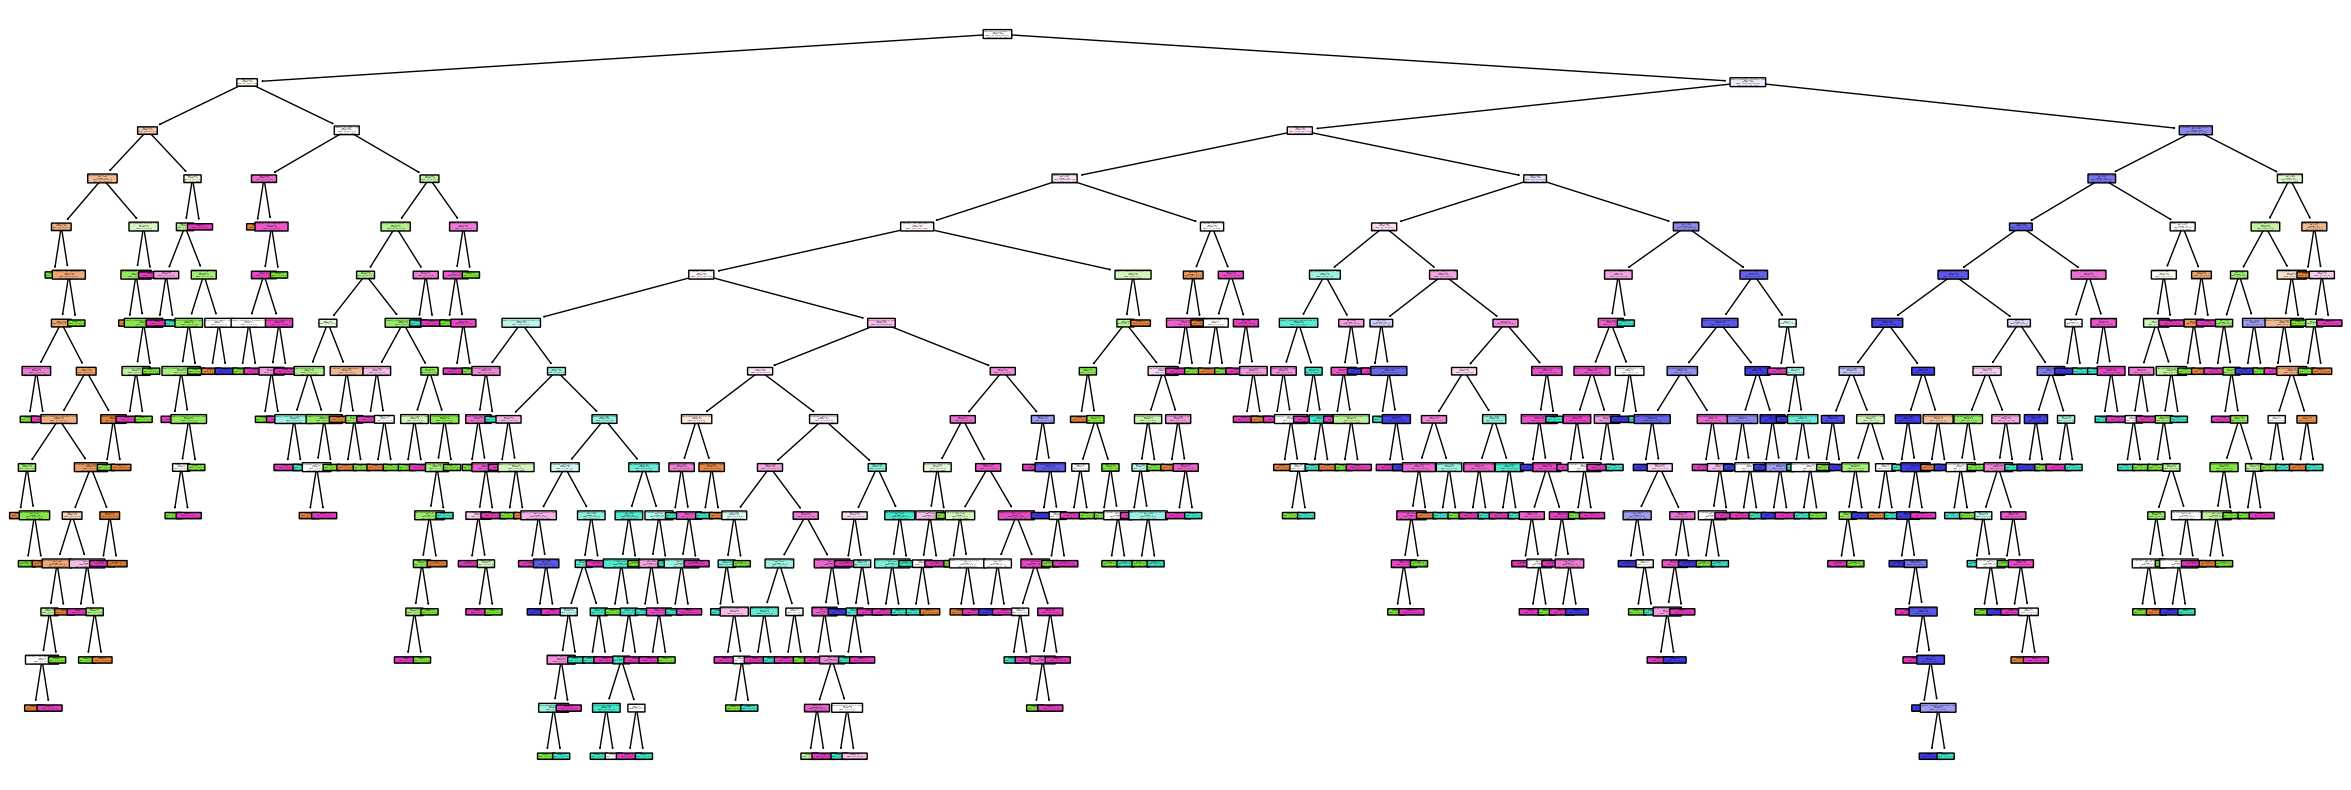

In [ ]:
# Visualizing the resultant tree
plt.figure(figsize=(30,10))
tree.plot_tree(best_decision_tree.fit(X_train, y_train), feature_names = X.columns, filled = True,
               class_names=best_decision_tree.classes_,
               rounded = True)
print('Best CART Tree')

plt.show()

## Cart Model Evaluation

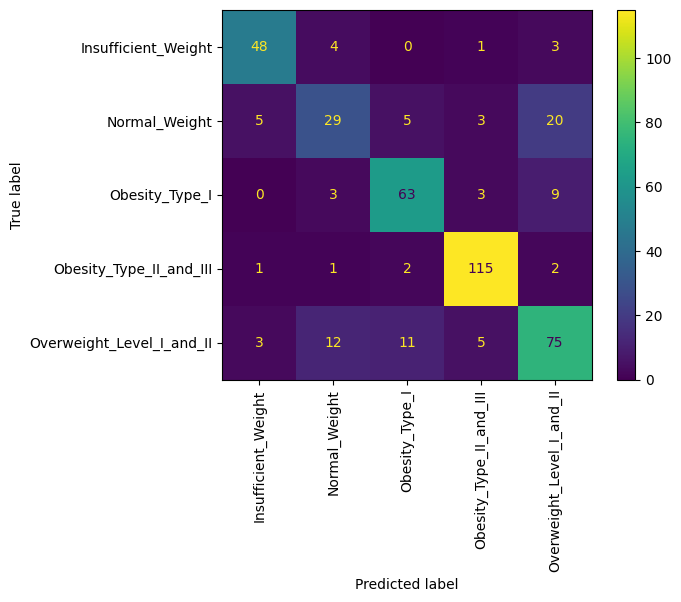

                           precision    recall  f1-score   support

      Insufficient_Weight       0.84      0.86      0.85        56
            Normal_Weight       0.59      0.47      0.52        62
           Obesity_Type_I       0.78      0.81      0.79        78
  Obesity_Type_II_and_III       0.91      0.95      0.93       121
Overweight_Level_I_and_II       0.69      0.71      0.70       106

                 accuracy                           0.78       423
                macro avg       0.76      0.76      0.76       423
             weighted avg       0.77      0.78      0.78       423

Feature: age, Importance: 0.15436596809938322
Feature: height, Importance: 0.14553424637166426
Feature: frequency_consumption_of_vegetables, Importance: 0.12569404196397305
Feature: number_of_main_meals, Importance: 0.10479217016836467
Feature: time_using_technology_devices, Importance: 0.08913419084548972
Feature: physical_activity_frequency, Importance: 0.08191940370396336
Feature: family_

In [ ]:
# Create and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=best_decision_tree.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_decision_tree.classes_)
disp.plot()
plt.xticks(rotation=90)
plt.show()

# Let's look at the model metrics
print(classification_report(y_test, y_pred))

# Get feature importance
feature_importance = best_decision_tree.feature_importances_

# Sort feature importance scores and corresponding feature names in descending order
sorted_features = sorted(zip(X_train.columns, feature_importance), key=lambda x: x[1], reverse=True)

# Print feature importance scores and corresponding feature names in descending order
for feature_name, importance_score in sorted_features:
    print(f"Feature: {feature_name}, Importance: {importance_score}")

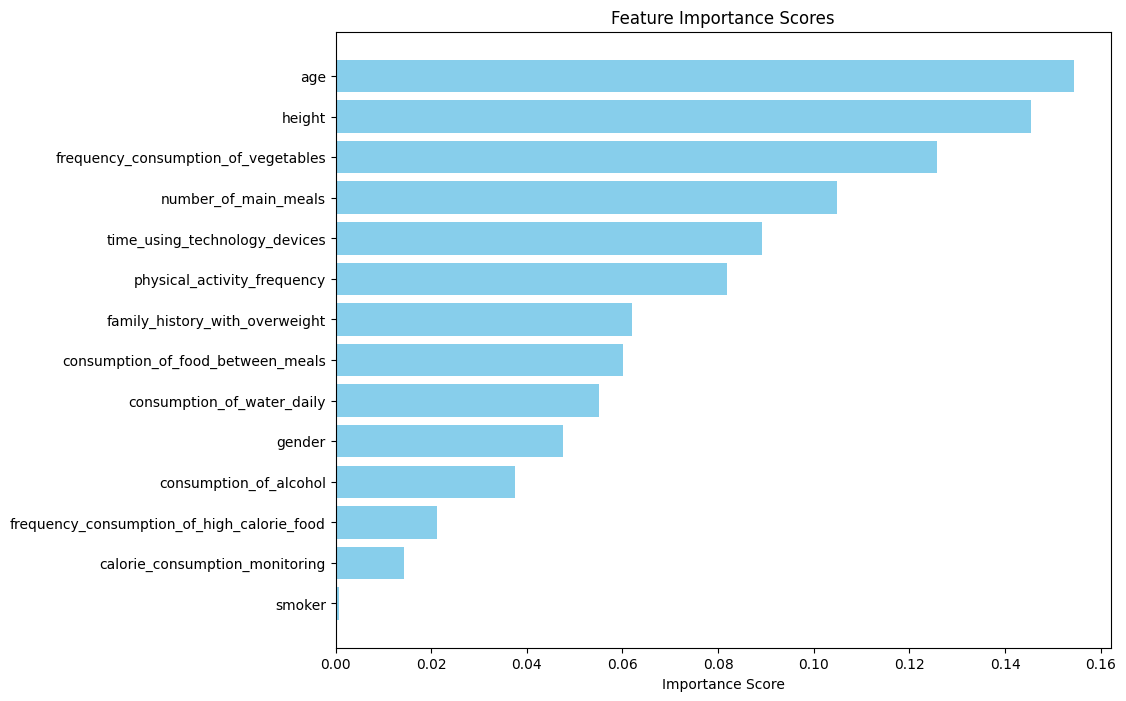

In [ ]:
feature_names, importance_scores = zip(*sorted_features)

# Create the horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(feature_names, importance_scores, color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance Scores')
plt.gca().invert_yaxis()  # To have the highest importance score at the top of the chart
plt.show()

## CART - Drop Weight and Height

{'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5}


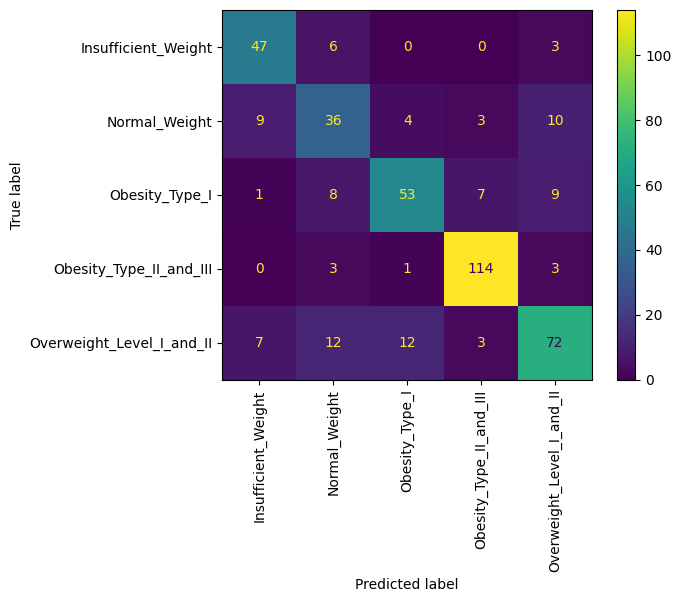

                           precision    recall  f1-score   support

      Insufficient_Weight       0.73      0.84      0.78        56
            Normal_Weight       0.55      0.58      0.57        62
           Obesity_Type_I       0.76      0.68      0.72        78
  Obesity_Type_II_and_III       0.90      0.94      0.92       121
Overweight_Level_I_and_II       0.74      0.68      0.71       106

                 accuracy                           0.76       423
                macro avg       0.74      0.74      0.74       423
             weighted avg       0.76      0.76      0.76       423

Feature: age, Importance: 0.19158703725247545
Feature: frequency_consumption_of_vegetables, Importance: 0.15192262280198165
Feature: time_using_technology_devices, Importance: 0.10895212767530532
Feature: physical_activity_frequency, Importance: 0.09980135839557114
Feature: number_of_main_meals, Importance: 0.09658217277775309
Feature: consumption_of_water_daily, Importance: 0.07903079074442

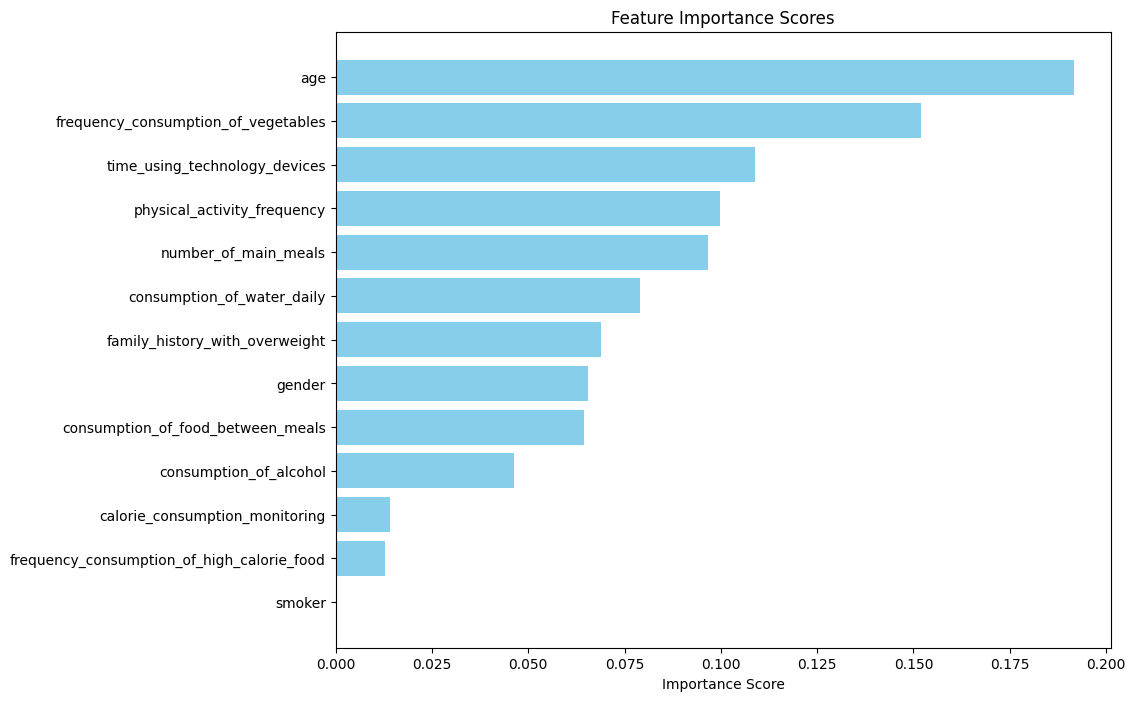

In [ ]:
# Split the data into features (X) and target (y)
X = df.drop(['obesity','weight', 'height', 'transportation_mode'], axis=1)
y = df['obesity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling for numerical features
num_cols = ['age', 'frequency_consumption_of_vegetables', 'number_of_main_meals', 'consumption_of_water_daily', 'physical_activity_frequency', 'time_using_technology_devices']  # Replace with actual numerical columns
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

parameters = {
    'max_depth': [5, 10, 12, 15],  # find depth
    'min_samples_split': [2, 5, 10],  # find minimum size in each sample
    'min_samples_leaf': [1, 2, 4]  # find minimum samples leaf
}

# create a tree
decision_tree = DecisionTreeClassifier(random_state = 42)

# Built GridSearchCV
gs = GridSearchCV(estimator=decision_tree, param_grid=parameters, cv=5)

# train and fit model
gs.fit(X_train, y_train)

# see result
print(gs.best_params_)

# Here is the best model
best_decision_tree = gs.best_estimator_

# get prediction
y_pred = best_decision_tree.predict(X_test)

# Create and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=best_decision_tree.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_decision_tree.classes_)
disp.plot()
plt.xticks(rotation=90)
plt.show()

# Let's look at the model metrics
print(classification_report(y_test, y_pred))

# Get feature importance
feature_importance = best_decision_tree.feature_importances_

# Sort feature importance scores and corresponding feature names in descending order
sorted_features = sorted(zip(X_train.columns, feature_importance), key=lambda x: x[1], reverse=True)

# Print feature importance scores and corresponding feature names in descending order
for feature_name, importance_score in sorted_features:
    print(f"Feature: {feature_name}, Importance: {importance_score}")

feature_names, importance_scores = zip(*sorted_features)

# Create the horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(feature_names, importance_scores, color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance Scores')
plt.gca().invert_yaxis()  # To have the highest importance score at the top of the chart
plt.show()